# **EXPLORATORY DATA ANALYSIS FOR LIAR 2 DATASET**

In [ ]:
# Install EDA libraries
!pip install datasets pandas matplotlib seaborn wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from wordcloud import WordCloud, STOPWORDS

# Make charts look professional
plt.style.use('ggplot')
sns.set_palette("husl")

In [ ]:
# 1. Load Data
print("Loading dataset...")
ds = load_dataset("chengxuphd/liar2", split="train")

# 2. Convert to Pandas DataFrame
df = pd.DataFrame(ds)

# 3. View the first few rows
print(f"Total Rows: {len(df)}")
display(df.head())

Loading dataset...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train.csv:   0%|          | 0.00/19.0M [00:00<?, ?B/s]

valid.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/18369 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2297 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2296 [00:00<?, ? examples/s]

Total Rows: 18369


,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


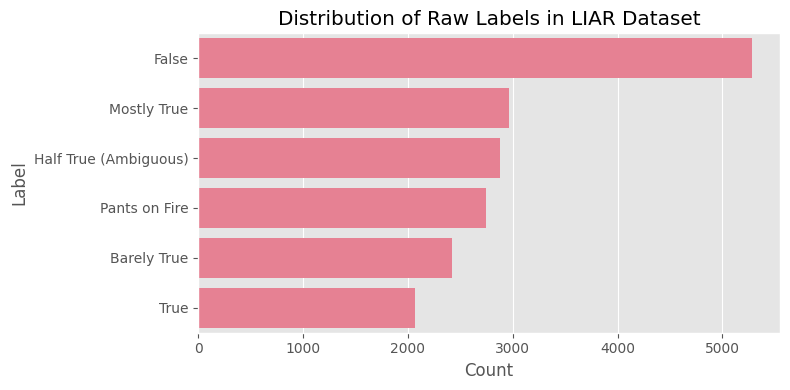

In [ ]:
# LIAR Label Mapping
# 0: Barely True, 1: False, 2: Half True, 3: Mostly True, 4: Pants on Fire, 5: True
label_names = {
    0: "Barely True",
    1: "False",
    2: "Half True (Ambiguous)",
    3: "Mostly True",
    4: "Pants on Fire",
    5: "True"
}

df['label_name'] = df['label'].map(label_names)

# Plot
plt.figure(figsize=(8, 4))
sns.countplot(y='label_name', data=df, order=df['label_name'].value_counts().index)
plt.title('Distribution of Raw Labels in LIAR Dataset')
plt.xlabel('Count')
plt.ylabel('Label')
plt.tight_layout()
plt.show()

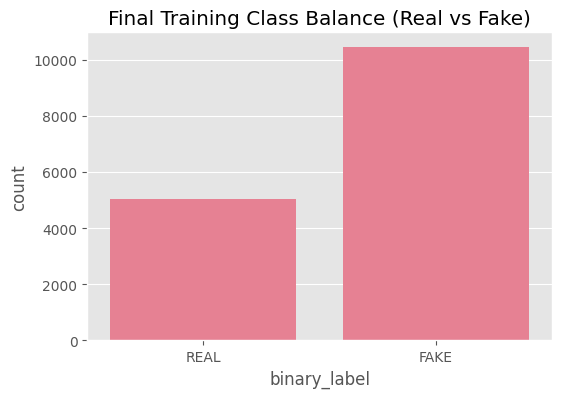

binary_label
FAKE    0.674889
REAL    0.325111
Name: proportion, dtype: float64


In [ ]:
# Apply the "Strict" Binary Mapping
def map_binary(label):
    if label in [3, 5]: return "REAL" # Mostly True, True
    if label in [0, 1, 4]: return "FAKE" # Barely, False, Pants on Fire
    return "AMBIGUOUS" # Half True

df['binary_label'] = df['label'].apply(map_binary)

# Remove the Ambiguous ones (just like in training)
df_clean = df[df['binary_label'] != "AMBIGUOUS"].copy()

# Plot the Final Training Balance
plt.figure(figsize=(6, 4))
sns.countplot(x='binary_label', data=df_clean)
plt.title('Final Training Class Balance (Real vs Fake)')
plt.show()

print(df_clean['binary_label'].value_counts(normalize=True))

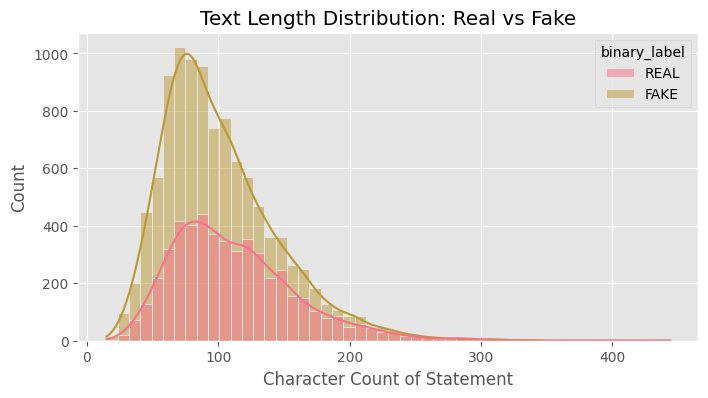

In [ ]:
# Calculate character length of every statement
df_clean['text_length'] = df_clean['statement'].apply(len)


# Plot Histogram
plt.figure(figsize=(8, 4))
sns.histplot(data=df_clean, x='text_length', hue='binary_label', kde=True, bins=50)
plt.title('Text Length Distribution: Real vs Fake')
plt.xlabel('Character Count of Statement')
plt.show()

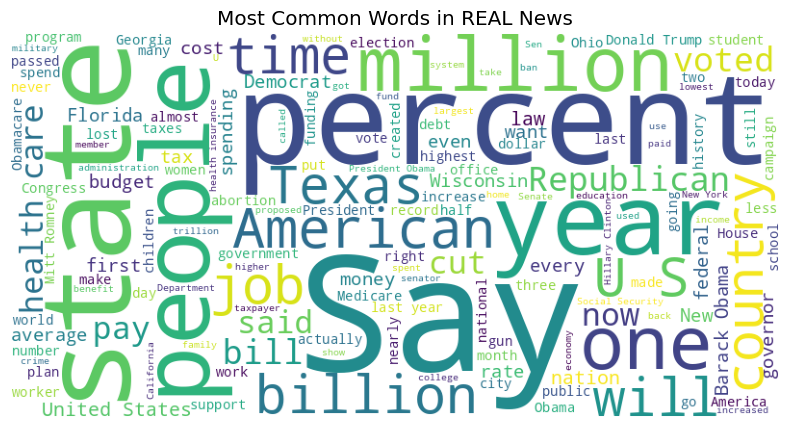

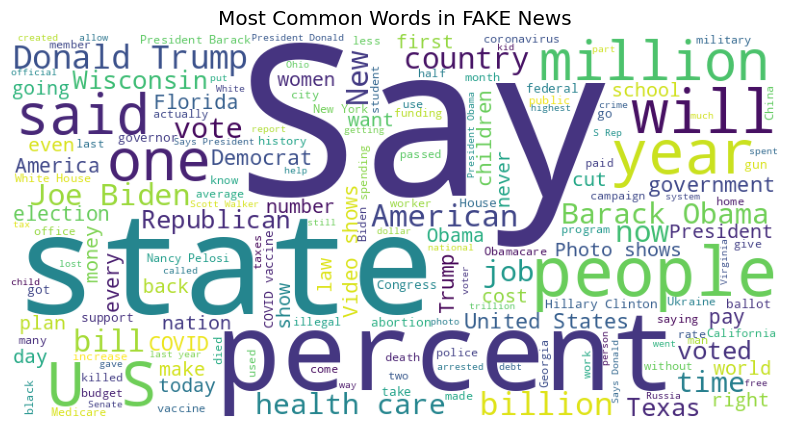

In [ ]:
# Helper function to generate Word Cloud
def plot_cloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white',
                          stopwords=STOPWORDS, min_font_size=10).generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(title)
    plt.show()

# 1. Real News Cloud
real_text = " ".join(df_clean[df_clean['binary_label'] == "REAL"]['statement'])
plot_cloud(real_text, "Most Common Words in REAL News")

# 2. Fake News Cloud
fake_text = " ".join(df_clean[df_clean['binary_label'] == "FAKE"]['statement'])
plot_cloud(fake_text, "Most Common Words in FAKE News")

In [ ]:
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
id                         0
label                      0
statement                  0
date                       0
subject                  164
speaker                    0
speaker_description        8
state_info              4499
true_counts                0
mostly_true_counts         0
half_true_counts           0
mostly_false_counts        0
false_counts               0
pants_on_fire_counts       0
context                  122
justification              0
label_name                 0
binary_label               0
dtype: int64
